# Basic SQL


### Learning Objectives

* Overview of relational databases
* Basic SQL
    * Table and schema creation
    * Loading data
    * Selection syntax
        * select
        * where
        * aggregations
        * group by
        * order by

        
### Getting Started

We will be using a pokemon dataset to play with the basics of SQL

We will use pandas and SQLite as helper to make it easy to create our own databases. In most workplace conditions the database will be created for you, and you will need to get instructions from your DBA about the proper way to connect to your flavor of SQL database

Usually you will need to have user credentials, a password, know the proper ip address and port, and install some drivers depending on the type of SQL. 

Just for a point of reference, see [here](https://dev.mysql.com/doc/connector-python/en/connector-python-example-connecting.html) on how you would use Python to connect to MySQL, one of the most popular SQL variants.

![](https://img.pokemondb.net/artwork/bulbasaur.jpg)

So to get started we will need to create a table:

In [127]:
import sqlite3 as sq3
import pandas.io.sql as pds
import pandas as pd

path = '../../sql'
con = sq3.Connection(path + 'pokemon.db')


query = '''CREATE TABLE IF NOT EXISTS pokemon (
    id INTEGER NOT NULL, 
    name VARCHAR(30) NOT NULL,
    species_id INTEGER, 
    height INTEGER NOT NULL, 
    weight INTEGER NOT NULL, 
    base_experience INTEGER NOT NULL, 
    "order" INTEGER NOT NULL, 
    is_default INTEGER NOT NULL, 
    PRIMARY KEY (id), 
    CHECK (is_default IN (0, 1))
);'''

con .execute(query);



The following is how we get all data from a table.

In [128]:
import pandas.io.sql as pds

query = '''SELECT * FROM pokemon;'''
pds.read_sql(query, con)

,id,name,species_id,height,weight,base_experience,order,is_default


We can see that we create a table! but it's empty. We need a way to load data into it:

In [129]:

query = '''
INSERT INTO pokemon (id,name, species_id, height, weight, base_experience, "order", is_default) 
VALUES (0,'Missingno', 0, 1, 0.1, 100, 0, 0);
'''
con.execute(query)
con.commit()

Now if we look at the table:

In [130]:

query = '''SELECT * FROM pokemon;'''
pds.read_sql(query, con)

,id,name,species_id,height,weight,base_experience,order,is_default
0,0,Missingno,0,1,0.1,100,0,0


We can see we have some data. a Single Pokemon

Really quick, lets try deleting that pokemon:

In [131]:
query = '''DELETE FROM pokemon where id=0;'''
con.execute(query)
con.commit()

And a Drop will get rid of that table all together:

In [132]:
query = '''DROP TABLE pokemon;'''
con.execute(query)
con.commit()

CREATE, INSERT, DELETE and DROP are useful to know, especially if you need to administer your own tables.

However, there are some methods built into Pandas that make this process way more convienient.

Let's try that now.

In [138]:
pokemon_df = pd.read_csv('data/pokemon_details.csv', index_col='id')
pokemon_df.to_sql('pokemon', con)

## Select
![](https://img.pokemondb.net/artwork/pikachu.jpg)

In [139]:
query = '''SELECT * FROM pokemon limit 10;'''
pds.read_sql(query, con)

,id,name,height,weight,base_experience,type1,type2
0,1,bulbasaur,7,69,64,Grass,Poison
1,2,ivysaur,10,130,142,Grass,Poison
2,3,venusaur,20,1000,236,Grass,Poison
3,4,charmander,6,85,62,Fire,None
4,5,charmeleon,11,190,142,Fire,None
5,6,charizard,17,905,240,Fire,Flying
6,7,squirtle,5,90,63,Water,None
7,8,wartortle,10,225,142,Water,None
8,9,blastoise,16,855,239,Water,None
9,10,caterpie,3,29,39,Bug,None


In [140]:
query = '''SELECT name,height,weight FROM pokemon;'''
pds.read_sql(query, con)

,name,height,weight
0,bulbasaur,7,69
1,ivysaur,10,130
2,venusaur,20,1000
3,charmander,6,85
4,charmeleon,11,190
5,charizard,17,905
6,squirtle,5,90
7,wartortle,10,225
8,blastoise,16,855
9,caterpie,3,29


In [141]:
height_weight = pds.read_sql(query, con)
height_weight

,name,height,weight
0,bulbasaur,7,69
1,ivysaur,10,130
2,venusaur,20,1000
3,charmander,6,85
4,charmeleon,11,190
5,charizard,17,905
6,squirtle,5,90
7,wartortle,10,225
8,blastoise,16,855
9,caterpie,3,29


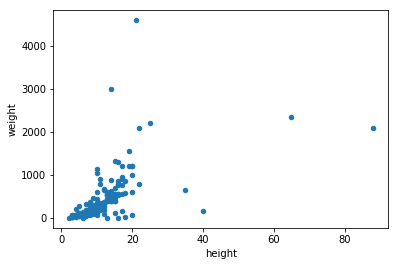

In [124]:
%matplotlib inline
height_weight.plot.scatter('height','weight')

### Exercise

Select just the "name", "type1" and "type2" columns from the "pokemon" table.

### Exercise

What types of pokemon are there?

### Exercise

How would you select all the distinct combinations of "type1" and "type2" present in the data? We haven't explicitly showed you how to do this, but take your best guess:

## Where

![](https://img.pokemondb.net/artwork/squirtle.jpg)

In [13]:
query = '''
SELECT name,height,weight,type1,type2 
FROM pokemon 
WHERE type1='Grass';'''
pds.read_sql(query, con)

,name,height,weight,type1,type2
0,bulbasaur,7,69,Grass,Poison
1,ivysaur,10,130,Grass,Poison
2,venusaur,20,1000,Grass,Poison
3,oddish,5,54,Grass,Poison
4,gloom,8,86,Grass,Poison
5,vileplume,12,186,Grass,Poison
6,bellsprout,7,40,Grass,Poison
7,weepinbell,10,64,Grass,Poison
8,victreebel,17,155,Grass,Poison
9,exeggcute,4,25,Grass,Psychic


### Logic operators

OR and AND can be used to combine multiple statements together

In [14]:
query = '''
SELECT name,height,weight,type1,type2 
FROM pokemon where type1='Grass' OR type2='Grass';'''
pds.read_sql(query, con)

,name,height,weight,type1,type2
0,bulbasaur,7,69,Grass,Poison
1,ivysaur,10,130,Grass,Poison
2,venusaur,20,1000,Grass,Poison
3,oddish,5,54,Grass,Poison
4,gloom,8,86,Grass,Poison
5,vileplume,12,186,Grass,Poison
6,paras,3,54,Bug,Grass
7,parasect,10,295,Bug,Grass
8,bellsprout,7,40,Grass,Poison
9,weepinbell,10,64,Grass,Poison


### Exercise

Select all the rows where "type1" is "grass" or "height" is greater than 10. Try to infer how you'd do this from the above example.

In [1]:
# Your code here


### Exercise
Which Pokemon weigh over 1000units?

In [16]:
query = '''
SELECT * 
FROM pokemon 
WHERE weight > 1000;'''
pds.read_sql(query, con)

,id,name,height,weight,base_experience,type1,type2
0,59,arcanine,19,1550,194,Fire,None
1,68,machamp,16,1300,227,Fighting,None
2,75,graveler,10,1050,137,Rock,Ground
3,76,golem,14,3000,223,Rock,Ground
4,87,dewgong,17,1200,166,Water,Ice
5,91,cloyster,15,1325,184,Water,Ice
6,95,onix,88,2100,77,Rock,Ground
7,103,exeggutor,20,1200,182,Grass,Psychic
8,111,rhyhorn,10,1150,69,Ground,Rock
9,112,rhydon,19,1200,170,Ground,Rock


In [17]:
query = '''
SELECT * 
FROM pokemon 
WHERE weight/height > 100;'''
pds.read_sql(query, con)

,id,name,height,weight,base_experience,type1,type2
0,75,graveler,10,1050,137,Rock,Ground
1,76,golem,14,3000,223,Rock,Ground
2,111,rhyhorn,10,1150,69,Ground,Rock
3,143,snorlax,21,4600,189,Normal,None


In [158]:
query = '''
SELECT * 
FROM pokemon 
WHERE type1 IN ('Ice','Water');'''
pds.read_sql(query, con)

,id,name,height,weight,base_experience,type1,type2
0,4,charmander,6,85,62,Fire,None
1,5,charmeleon,11,190,142,Fire,None
2,6,charizard,17,905,240,Fire,Flying
3,7,squirtle,5,90,63,Water,None
4,8,wartortle,10,225,142,Water,None
5,9,blastoise,16,855,239,Water,None
6,37,vulpix,6,99,60,Fire,None
7,38,ninetales,11,199,177,Fire,None
8,54,psyduck,8,196,64,Water,None
9,55,golduck,17,766,175,Water,None


### Exercise

Select all the rows where "type2" is _not_ Ice or Water. Try to modify the above query to do this.

In [162]:
# Your code here

query = '''
SELECT * 
FROM pokemon 
WHERE type2 NOT IN ('Ice','Water') OR type2 IS NULL;
'''
pds.read_sql(query, con)

,id,name,height,weight,base_experience,type1,type2
0,1,bulbasaur,7,69,64,Grass,Poison
1,2,ivysaur,10,130,142,Grass,Poison
2,3,venusaur,20,1000,236,Grass,Poison
3,4,charmander,6,85,62,Fire,None
4,5,charmeleon,11,190,142,Fire,None
5,6,charizard,17,905,240,Fire,Flying
6,7,squirtle,5,90,63,Water,None
7,8,wartortle,10,225,142,Water,None
8,9,blastoise,16,855,239,Water,None
9,10,caterpie,3,29,39,Bug,None


## Aggregations

![](https://img.pokemondb.net/artwork/charmander.jpg)

In [163]:
query = '''
SELECT count(*) 
FROM pokemon '''
pds.read_sql(query, con)

,count(*)
0,151


In [164]:
query = '''
SELECT sum(weight)
FROM pokemon '''
pds.read_sql(query, con)

,sum(weight)
0,69387


In [165]:
query = '''
SELECT sum(weight)/151.0
FROM pokemon '''
pds.read_sql(query, con)

,sum(weight)/151.0
0,459.516556


In [166]:
query = '''
SELECT avg(weight)
FROM pokemon '''
pds.read_sql(query, con)

,avg(weight)
0,459.516556


In [167]:
query = '''
SELECT min(weight),max(weight)
FROM pokemon '''
pds.read_sql(query, con)

,min(weight),max(weight)
0,1,4600


## Group By

![](https://img.pokemondb.net/artwork/magikarp.jpg)

In [168]:
query = '''
SELECT type1,count(*)
FROM pokemon
GROUP BY type1
ORDER BY count(*) DESC'''
pds.read_sql(query, con)

,type1,count(*)
0,Water,28
1,Normal,22
2,Poison,14
3,Bug,12
4,Fire,12
5,Grass,12
6,Electric,9
7,Rock,9
8,Ground,8
9,Psychic,8


In [172]:
query = '''
SELECT type1,avg(weight) as average_weight, avg(height) as average_height
FROM pokemon
GROUP BY 1'''
pds.read_sql(query, con)

,type1,average_weight,average_height
0,Bug,229.916667,9.000000
1,Dragon,766.000000,26.666667
2,Electric,317.888889,8.555556
3,Fairy,237.500000,9.500000
4,Fighting,542.857143,11.857143
5,Fire,480.250000,12.166667
6,Ghost,135.666667,14.666667
7,Grass,279.916667,10.833333
8,Ground,452.625000,8.500000
9,Ice,480.000000,15.500000


### Exercise

Get the count, average weight, and average height of pokemon, but grouped by Type 2.

In [2]:
# Your code here


## Order By

![](https://img.pokemondb.net/artwork/jigglypuff.jpg)

In [179]:
query = '''
SELECT type1,avg(weight) as avg_weight, avg(height) as avg_height
FROM pokemon
GROUP BY type1
ORDER BY avg_height'''
pds.read_sql(query, con)

,type1,avg_weight,avg_height
0,Ground,452.625000,8.500000
1,Electric,317.888889,8.555556
2,Bug,229.916667,9.000000
3,Fairy,237.500000,9.500000
4,Normal,500.863636,9.863636
5,Grass,279.916667,10.833333
6,Fighting,542.857143,11.857143
7,Fire,480.250000,12.166667
8,Poison,273.142857,12.214286
9,Psychic,515.625000,12.500000


In [31]:
query = '''
SELECT type1,avg(weight) as avg_weight, avg(height)
FROM pokemon
GROUP BY type1
ORDER BY avg_weight DESC'''
pds.read_sql(query, con)

,type1,avg_weight,avg(height)
0,Rock,876.111111,18.444444
1,Dragon,766.000000,26.666667
2,Water,579.678571,13.000000
3,Fighting,542.857143,11.857143
4,Psychic,515.625000,12.500000
5,Normal,500.863636,9.863636
6,Fire,480.250000,12.166667
7,Ice,480.000000,15.500000
8,Ground,452.625000,8.500000
9,Electric,317.888889,8.555556


### Exercise

What is the "type1"-"type2" combination that has the highest minimum weight in the dataset? What about the one with the lowest minimum weight?

## Having

In [187]:
query = '''
SELECT type1,avg(weight) as avg_weight, avg(height)
FROM pokemon
GROUP BY type1
ORDER BY avg_weight DESC'''
pds.read_sql(query, con)

,type1,avg_weight,avg(height)
0,Rock,876.111111,18.444444
1,Dragon,766.000000,26.666667
2,Water,579.678571,13.000000
3,Fighting,542.857143,11.857143
4,Psychic,515.625000,12.500000
5,Normal,500.863636,9.863636


### Exercise

Show all the "type2" categories that have a minimum height of greater than 10. Create a CSV that contains all these categories.

Which of these types has the highest maximum height?

![](https://sqlite.org/images/syntax/select-core.gif)